<a href="https://colab.research.google.com/github/Rohithv07/ml/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a predictive model that answers the question: "How many people are likely to survive?"

In this notebook, we make use of the Titanic Machine Learning from Disaster - A Kaggle Competition - in order to make a machine learning model to predict how many people are likely to survive the disaster.

## Problem Definition
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

https://www.kaggle.com/c/titanic/overview

## Data

The data we are given is mainly splitted into 2 groups:
1. Train.csv
2. Test.csv

For training set, we provide the outcome for each of the passengers.Our model will be based on "features" like passengers gender, and class.

For testing set, we will not be having the outcome and we need to predict it so we can understand how well our model fits into the data set.


## Evaluation
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

https://www.kaggle.com/c/titanic/overview/evaluation

## Features
Data Dictionary

Variable	Definition	    Key
survival	Survival	    0 = No, 1 = Yes
pclass	  Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

https://www.kaggle.com/c/titanic/data

First of all we can mount our drive and import the necessary modules like numpy, pandas, matplotlib etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Lets import the training data
df = pd.read_csv("drive/My Drive/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


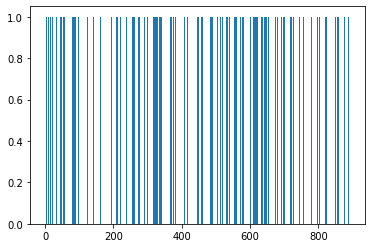

In [4]:
# Lets just go through the datas and do some exploration and some visualization
fig, ax = plt.subplots()
# Lets try to do a bar graph on survived and the passengerId
plt.bar(df.PassengerId, df.Survived);

In [7]:
# Lets find how many null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we have 177 values of age as null, cabin 687 as null and Embarked 2

In [6]:
df.Name.dtype

dtype('O')

In [8]:
df.Sex.dtype

dtype('O')

So we are seeing string, objects as the type and we need numerical data. So all the strings or other types need to be converted into numbers before we fit this into model.
What happens if we do not make it into numbers and tried to fit on a model.
Just a small showing by selecting any predictive model.

## Testing on what happens if we do not convert our data into numbers fully

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [9]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [10]:
X, y

(     PassengerId  Pclass  ... Cabin Embarked
 0              1       3  ...   NaN        S
 1              2       1  ...   C85        C
 2              3       3  ...   NaN        S
 3              4       1  ...  C123        S
 4              5       3  ...   NaN        S
 ..           ...     ...  ...   ...      ...
 886          887       2  ...   NaN        S
 887          888       1  ...   B42        S
 888          889       3  ...   NaN        S
 889          890       1  ...  C148        C
 890          891       3  ...   NaN        Q
 
 [891 rows x 11 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [11]:
len(X), len(y)

(891, 891)

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [13]:
X_train, y_train

(     PassengerId  Pclass  ... Cabin Embarked
 860          861       3  ...   NaN        S
 424          425       3  ...   NaN        S
 208          209       3  ...   NaN        Q
 483          484       3  ...   NaN        S
 755          756       2  ...   NaN        S
 ..           ...     ...  ...   ...      ...
 580          581       2  ...   NaN        S
 698          699       1  ...   C68        C
 829          830       1  ...   B28      NaN
 393          394       1  ...   D36        C
 145          146       2  ...   NaN        S
 
 [712 rows x 11 columns],      PassengerId  Pclass  ... Cabin Embarked
 414          415       3  ...   NaN        S
 786          787       3  ...   NaN        S
 235          236       3  ...   NaN        S
 410          411       3  ...   NaN        S
 192          193       3  ...   NaN        S
 ..           ...     ...  ...   ...      ...
 62            63       1  ...   C83        S
 29            30       3  ...   NaN        S
 289   

In [14]:
model = SGDRegressor(penalty="l2", max_iter=5)
model.fit(X_train, y_train)

# Before hitting the run, it is sure that an error will be shown and our model will not be fitted into the data due to non numerical data

ValueError: ignored

So as expected we see a valueError. SO our next step must be to turn all the string to numerical data

## Convert Strings to Categories

In [15]:
df_tmp = df.copy()

In [16]:
pd.api.types.is_string_dtype(df_tmp["Sex"])

True

In [17]:
# Lets do a loop to find all string type
for label, content in df_tmp.items():
  if (pd.api.types.is_string_dtype(content)):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


Now we know what are the string values given in the data set. So now we can convert them into numericals

In [18]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


**Now we see all our values are filled and changed from strings to categorical types**

In [20]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Next step what we have to do is we still have some missing datas in our data set and we need to somehow fill those columns with some suitable values.

## Fill missing values

Lets start by filling the numerical values first and then with the other types of data

### Fill numerical values

Lets find which of the columns have the values of numeric type and then find which of them is having null values.


In [21]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


So these are the numerical values present in our data set. And now we need to look for the empty values

In [22]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

Age


Now we got age as the only one in numeric type that got missing values.
In most of the cases, we uses median to fill the missing values. SO let us use the same technique here too.

In [23]:
# Fill numeric rows with median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_tmp[label] = content.fillna(content.median())

In [24]:
# Lets check whether we filled or not
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

Yeah! We see that now we have no missing numerical values and we have filled them all.

In [25]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Still we have missing values in our data set and lets check which is its type and then we can fill the missing values.

In [26]:
# Lets check the type of cabin and embarked
df_tmp.Cabin.dtype, df_tmp.Embarked.dtype

(CategoricalDtype(categories=['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26',
                   'A31', 'A32',
                   ...
                   'E8', 'F E69', 'F G63', 'F G73', 'F2', 'F33', 'F38', 'F4',
                   'G6', 'T'],
                  ordered=True),
 CategoricalDtype(categories=['C', 'Q', 'S'], ordered=True))

So we see that both of the values are categorical type and for this at first we need to change the categorical data to numeric types and then fill the missing values

### Convert categorical to numerical and fill the missing values

In [27]:
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


In [28]:
# Convert them into number
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Turn categories into numeric
    df_tmp[label] = pd.Categorical(content).codes+1

Just we can check whether we still have any missing values

In [29]:
# Make sure for the missing values
df_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Ok! Now we see that all the values have no missing values and the dtype is altogether numeric


In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


Now lets continue with the step that we stopped earlier. Yes just make sure that our model will fit to any of the model and then we can go through different model and select the best one from it according to the score values

## Modelling

In [31]:

X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

In [35]:
len(X), len(y)

(891, 891)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [37]:
len(X_train), len(y_train), len(X_test), len(y_test)

(712, 712, 179, 179)

In [38]:
df_tmp.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


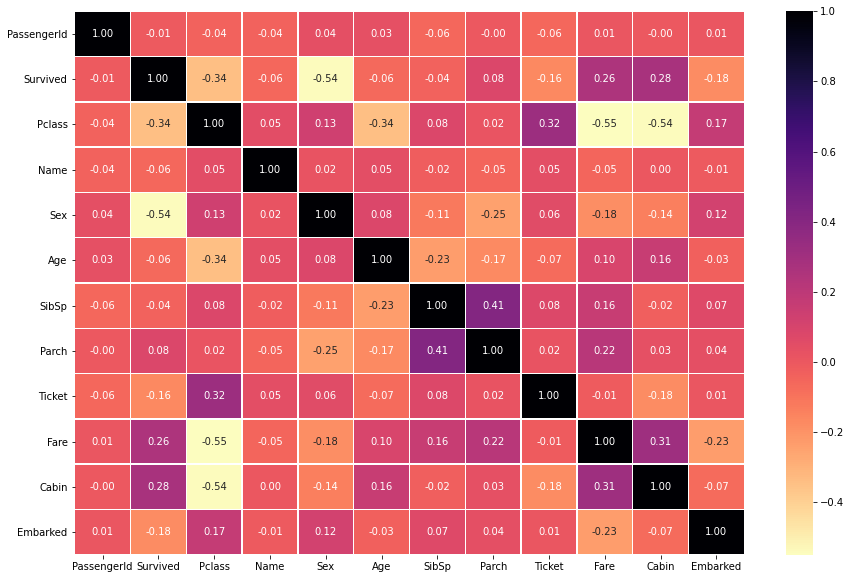

In [40]:
# Lets visualise the correlation matrix
import seaborn as sns
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="magma_r")

In [50]:
model = SGDRegressor(penalty="l2", max_iter=1000)
model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [52]:
score_SGD = model.score(X_train, y_train)
score_SGD

-3.542856835149913e+29

In [53]:
# Lets try randomforestregressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
score_random_forest = model.score(X_train, y_train)
score_random_forest

0.9183041899915181

In [58]:
# Lets try different model from our roadmao
from sklearn import linear_model
model = linear_model.LassoLars(alpha=0.1)
model.fit(X_train, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [59]:
score_lasso = model.score(X_train, y_train)
score_lasso

0.0

In [61]:
from sklearn import linear_model
model = linear_model.BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [63]:
score_baye = model.score(X_train, y_train)
score_baye

0.358230057917034

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [69]:
df_tmp.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,446.000000,1.647587,29.361582,0.523008,0.381594,339.528620,32.204208,17.629630,2.529742
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,38.140335,0.800254
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,223.500000,1.000000,22.000000,0.000000,0.000000,159.500000,7.910400,0.000000,2.000000
50%,446.000000,0.000000,3.000000,446.000000,2.000000,28.000000,0.000000,0.000000,338.000000,14.454200,0.000000,3.000000
75%,668.500000,1.000000,3.000000,668.500000,2.000000,35.000000,1.000000,0.000000,520.500000,31.000000,0.000000,3.000000
max,891.000000,1.000000,3.000000,891.000000,2.000000,80.000000,8.000000,6.000000,681.000000,512.329200,147.000000,3.000000


In [70]:
df_tmp["Sex"]

0      2
1      1
2      1
3      1
4      2
      ..
886    2
887    1
888    1
889    2
890    2
Name: Sex, Length: 891, dtype: int8

In [73]:
df_tmp.Sex

0      2
1      1
2      1
3      1
4      2
      ..
886    2
887    1
888    1
889    2
890    2
Name: Sex, Length: 891, dtype: int8

In [74]:
# Lets split our df_tmp based on sex into validation and training set and we are continuing with randomforestregressor
df_val = df_tmp[df_tmp.Sex == 1] # I think 1 is female and 2 is male or the other way. Whatever lets split the data
df_train = df_tmp[df_tmp.Sex == 2]

In [75]:
len(df_val), len(df_train)

(314, 577)

In [76]:
X_train, y_train = df_train.drop("Survived", axis=1), df_train.Survived
X_valid, y_valid = df_val.drop("Survived", axis=1), df_val.Survived

In [77]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((577, 11), (577,), (314, 11), (314,))

### Lets build evaluation function


In [79]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
  """
  calculaye root mean squared log error between prediciton and true values
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
  """
  Function to evaluate model on different levels
  """
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)

  scores = {
      "Training MAE": mean_absolute_error(y_train, train_preds),
      "Valid MAE": mean_absolute_error(y_valid, val_preds),
      "Training RMSLE": rmsle(y_train, train_preds),
      "Valid RMSLE": rmsle(y_valid, val_preds),
      "Training R2SCORE": r2_score(y_train, train_preds),
      "Valid R2SCORE": r2_score(y_valid, val_preds)
  }
  return scores

### Lets test our model with the above values

In [81]:
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=300)

In [82]:
%%time
model.fit(X_train, y_train)

CPU times: user 289 ms, sys: 25.3 ms, total: 314 ms
Wall time: 246 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=300, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
show_scores(model)

{'Training MAE': 0.14812824956672443,
 'Training R2SCORE': 0.7061261134634989,
 'Training RMSLE': 0.14668931296588608,
 'Valid MAE': 0.5537261146496816,
 'Valid R2SCORE': -1.1203643193980821,
 'Valid RMSLE': 0.4160387948292806}